## Normalizing the data i.e mean is 0 and standard deviation as 1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dfx=pd.read_csv('linearX.csv')
dfy=pd.read_csv('linearY.csv')


print(dfx.shape)
print(dfy.shape)


X=dfx.values
Y=dfy.values


print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)
(99, 1)
(99, 1)


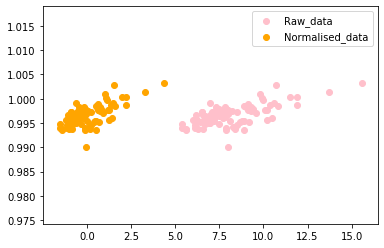

In [9]:
# Normalizing the data
# Here First subract then divide i.e use brackets else wrong answer

XM=(X-X.mean())/X.std()


plt.scatter(X,Y,color='pink',label='Raw_data')
plt.scatter(XM,Y,color='orange',label='Normalised_data')
plt.legend()
plt.show()

# Label will work only with legend

### We can see that pink is more spreaded i.e deviation little more than 1 ,however orange has deviation of 1

# Natural Language Pre Processing

### The open source library we use for this is nltk i.e natural language toolkit  

In [19]:
import nltk


paragraph="""I have three visions for India. In 3000 years of our history, people from all over 
the world have come and invaded us, captured our lands, conquered our minds. 
From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
the French, the Dutch, all of them came and looted us, took over what was ours. 
"""



sentence=nltk.sent_tokenize(paragraph)
print(sentence[:2])


print('\n')


word=nltk.word_tokenize(paragraph)
print(word[:7])


print('\n')
print(len(word))

['I have three visions for India.', 'In 3000 years of our history, people from all over \nthe world have come and invaded us, captured our lands, conquered our minds.']


['I', 'have', 'three', 'visions', 'for', 'India', '.']


73


### Notice even full stop and comman are considered as words

### Stemming and Lemmatization are Text Normalization (or sometimes called Word Normalization) techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing.

### Stemming is the process of reducing words to their root form such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language. example finay ,final, finalized all are converted to fina  . example of stemming is gmail spam classifier , positive negative sentiment analysics, as here we just need to find the base word no need to have a proper meaning of that word

### What lemmatization do is it convert to a word having meaning example  finally ,final, finalized all are converted to final i.e end word has a definite meaning unlike stemming . However lemmatization is time consuming. It is used in chat bots , 

In [15]:
import nltk

# In stem class (Porter stemmer) library is present used for stemming
from nltk.stem import PorterStemmer


# Stop words Remove the words from paragraph that does not have much meaning i.e of, then, and, our ,there 
# They are Repeated many times and doesnot contribute to positive negative analysics
from nltk.corpus import stopwords


all_stop_words=stopwords.words('english')
print(all_stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [23]:
sentence=nltk.sent_tokenize(paragraph)

In [24]:
# Creating the object of Porter stemmer named as stemmer

stemmer=PorterStemmer()

In [25]:
# Now we will do List compression i.e removing the stopwords
# set is used for consider any duplicacy
 

for i in range(len(sentence)):
    # Step-1  Take the sentence and tokenize to that words 
    words=nltk.word_tokenize(sentence[i])
    
    
    # Step-2 If word does not belong to the stopwords then perform stemming to that word else Remove that word
    words=[stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    
    
    # Step-3 Rejoin that word to sentence
    sentence[i]=' '.join(words)
    print(sentence[i])
    

I three vision india .
In 3000 year histori , peopl world come invad us , captur land , conquer mind .
from alexand onward , greek , turk , mogul , portugues , british , french , dutch , came loot us , took .


#### History is stemmed to histori( major problem with stemming that produces intermidiate word which does not have any meaning) , turks to turk and so on 
#### Similary words like from , and etc are removed

# Lemmitization

In [26]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords



paragraph="""I have three visions for India. In 3000 years of our history, people from all over 
the world have come and invaded us, captured our lands, conquered our minds. 
From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
the French, the Dutch, all of them came and looted us, took over what was ours. 
"""


sentences = nltk.sent_tokenize(paragraph)
lemmatizer = WordNetLemmatizer()


for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i] = ' '.join(words)
    print(sentences[i])

I three vision India .
In 3000 year history , people world come invaded u , captured land , conquered mind .
From Alexander onwards , Greeks , Turks , Moguls , Portuguese , British , French , Dutch , came looted u , took .


# Bag_of_Words

In [10]:
import nltk

paragraph =  """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? """
               
               

# Cleaning the texts
# Here re is for regular expression
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer



ps = PorterStemmer()
wordnet=WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
corpus = []



for i in range(len(sentences)):
    # i.e remove full stop , comma and all and only take words from a to z and replace them with space bar
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    # split will split the sentences to the word list form
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    
    
    
    
# Creating the Bag of Words model
# sklearn will have all the functionalities to convert to bag of words
# fit_transform will make a table and toarray is there to have a visullay Reprentable form


from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()


In [11]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Major Disadvantage of bag of words is that it has not semantic meaning that it has either 0 or 1 i.e all words are treated with same weight however in NLP say good and boy are not the same words good has the sentence changing power

# TF (Term_Frequency) and IDF(Inverse_Document_Frequency)

In [12]:
import nltk

paragraph =  """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on."""
               
               
        
# Cleaning the texts
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
wordnet=WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
corpus = []
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    
# Creating the TF-IDF model
# Here we use the Library tfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

In [14]:
print(X[:3,:3])

[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.28867513 0.         0.        ]]
